In [18]:
#Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler


In [3]:
#Downloading the dataset
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-12-22 09:42:14--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-12-22 09:42:14 (41.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
#Loading the dataset
data = pd.read_csv('moore.csv',header=None)

In [5]:
data

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
...,...,...
157,2017,18000000000
158,2017,19200000000
159,2018,8876000000
160,2018,23600000000


In [6]:
#Convert to an Numpy array
data = np.array(data)

In [7]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [8]:
#Split the dataset into X(Independent variables) and y(output/dependent variables)
X = data[:,0].reshape(-1,1)#Reshaping to turn the train data into 2d(N,dim) as it iis now only 1d(N)
y = data[:,1]

In [9]:
X.shape

(162, 1)

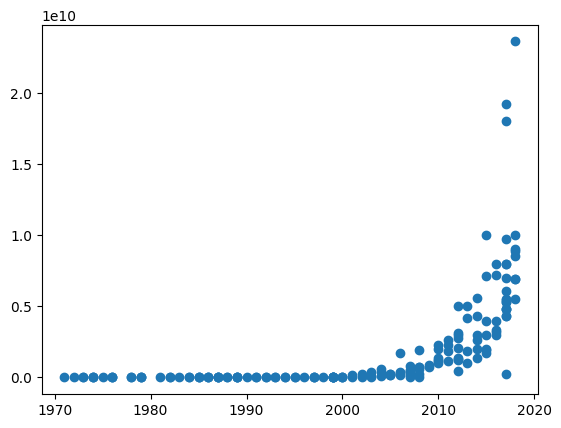

In [12]:
#Scatter plot for X and y
plt.scatter(X,y)


In [14]:
#As you can see an exponential growth for output, we must convert it to Linear distribution for Linear regression to fit
#Inorder to convert the output(y) to Linear distribution, you can take the log(y)
y = np.log(y)


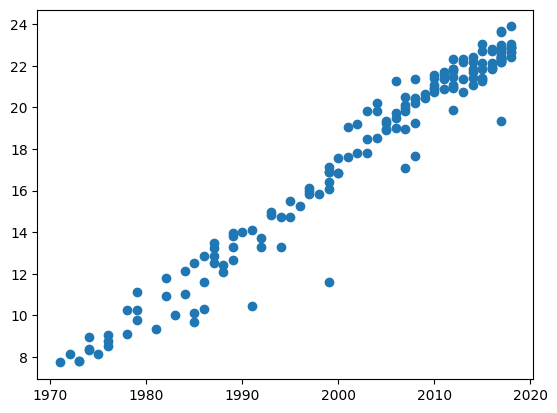

In [15]:
#Now, let's plot again(Linear Distribution has taken place)
plt.scatter(X,y)

In [16]:
#Fitting over a 50 years as input is not good,so one must convert it to a standard distribution over a value
#You can perform standard deviation for a normal Distribution(It depends how one want his data to be)
X = X - X.mean()

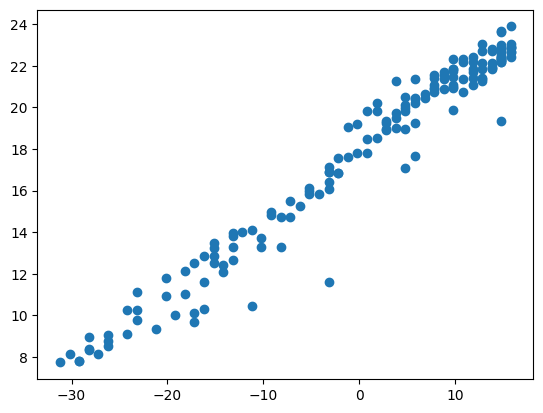

In [17]:
#You can now see there is a normal distribution for predictor
plt.scatter(X,y)

In [20]:
#Initialize the model
model = Sequential()
model.add(Dense(1,input_dim=1,)) #Input and Output neuron units just 1 as we need only 1 value. No need of any activation function as we require continous distribution. input_dim=provide the dimension of input data(here 1)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#Initialize a Learning Rate Scheduler
def schedule(epochs,lr):
  if epochs>50:
    return 0.0001
  return 0.001

In [23]:
#Compile the model with hyperparameters
model.compile(optimizer='SGD',loss='mse')

In [24]:
#Calling the Learning Scheduler
scheduler = LearningRateScheduler(schedule)

In [25]:
#Fit the model
r = model.fit(X,y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 316.5530 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 313.3897 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 304.2841 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 297.6651 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 287.0339 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 281.0545 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 273.6658 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 267.5700 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 265.1425 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 254.1324 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - los

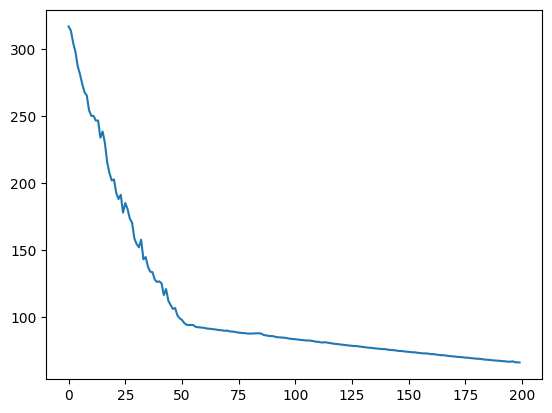

In [27]:
#Do not worry about the loss mentioned here(as it is Linear Regression)
#Plot the loss
plt.plot(r.history['loss'])

In [40]:
#Lets get the slope(weights) and intercept(bias) of the Linear Equation
slope = model.layers[0].get_weights()[0][0][0]
intercept = model.layers[0].get_weights()[1][0]
print("Slope(m): ",slope)
print("intercept(b): ",intercept)

Slope(m):  0.32034495
intercept(b):  9.710229
